# Read and plot a SWOT-HR Pixel Cloud netcdf products 
*Authors: Lionel Zawadzki, CNES*

## Summary
In this notebook, we show how to read the SWOT-HR pixel cloud products with xarray and how to represent a variable on a map with cartopy.

## Import libraries
Please note that apart from the libraries listed in the cell below, you need to install the h5netcdf library (conda install -c conda-forge h5netcdf). This will be used by th xarray.open_dataset function to read the netcdf files.

In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read a SWOT-HR Pixel Cloud netcdf product
Note this is an extraction of the original file for demonstration purpose. It does not contain all variables and groups

In [2]:
dir_swot = "../docs/data/swot"
file_swot_pxc = os.path.join(dir_swot, "SWOT_L2_HR_PIXC", "SWOT_L2_HR_PIXC_015_033_163R_20240509T115817_20240509T115828_PIC0_01_extract.nc")
# read data with xarray, specifying a group in the netcdf structure
xr_pxc = xr.open_dataset(file_swot_pxc, group="pixel_cloud")


In [3]:

# remove undefined values based on variable of interest
xr_pxc = xr_pxc.where(
    (xr_pxc['classification']>=3) &
    (xr_pxc['sig0']>=20) &
    (xr_pxc['cross_track']>=10000) &
    ~np.isnan(xr_pxc['height'])
)
xr_pxc['wse'] = xr_pxc['height'] - xr_pxc['geoid']
xr_pxc

<xarray.Dataset>
Dimensions:         (points: 10001)
Coordinates:
    latitude        (points) float64 4.597 4.597 4.597 ... 4.653 4.652 4.652
    longitude       (points) float64 -53.06 -53.06 -53.06 ... -53.39 -53.39
Dimensions without coordinates: points
Data variables:
    classification  (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    coherent_power  (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    cross_track     (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    geoid           (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    height          (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    sig0            (points) float32 nan nan nan nan nan ... nan nan nan nan nan
    wse             (points) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3277
    interferogram_size_range:    4694
    looks_to_efflooks:           1.55135648150391
    num_azimuth_looks:           7.0
    azimuth_offset:              7

### 3. Plot data on maps with cartopy

Text(0.5, 1.0, 'Pixel Cloud')

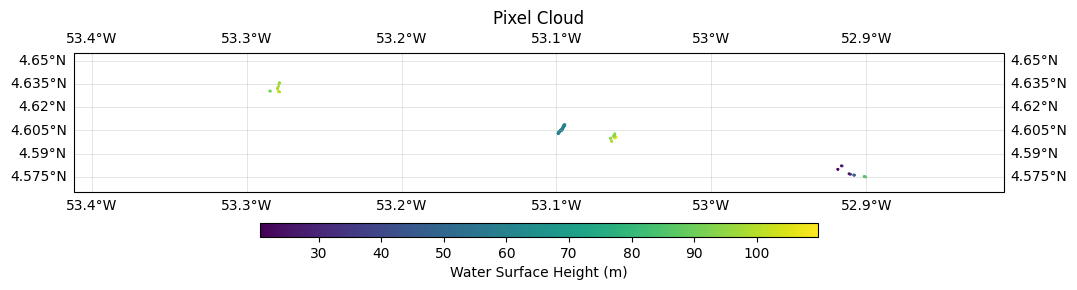

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


def customize_map(ax, cb, label, crs=ccrs.PlateCarree()):
    """This function customizes a map with projection and returns the plt.axes instance"""

    ax.gridlines(
        crs=crs,
        draw_labels=True,
        color='.7',
        alpha=.6,
        linewidth=.4,
        linestyle='-',
        )
    
    # add a background_map (default, local image, WMTS...read the doc)
    # ax.stock_img()

    # add a labeled colorbar
    plt.colorbar(
        cb,
        ax=ax,
        orientation='horizontal',
        shrink=0.6,
        pad=.05,
        aspect=40,
        label=label)

    return ax


# 0. Create Figure and Axes
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    subplot_kw={'projection': crs},
    figsize=(12,8),
    frameon=True,
    )

# 1. plot data on the map with scatter function
cb0 = ax.scatter(
    x=xr_pxc.longitude,
    y=xr_pxc.latitude,
    c=xr_pxc.wse,
    s=1,
    transform=crs,
    cmap='viridis',
    )
# Initiate a map with the function above for Pixel cloud
customize_map(ax, cb0, "Water Surface Height (m)")
# limit map boundaries based on actual data
ax.set_extent(
    [
        xr_pxc.longitude.min(),
        xr_pxc.longitude.max(),
        xr_pxc.latitude.min(),
        xr_pxc.latitude.max(),
    ], 
    crs=crs
    )
ax.set_title("Pixel Cloud")